# Overfitting, underfitting, and generalization

- After training, a model should be able to make accurate predictions on new, unseen data. 
    - There is a subtle assumption behind this expectation: the new, 'unseen' data is also drawn from the same underlying distribution of the training data.
    - Say, you have trained a model for temperature prediction, but all of your training data is from a hot place like Jodhpur. You can't expect that model to work well in Siberia, for instance. 
    -  To read more on this very important (for understanding, not necessarily for the exam), have a look at the wiki article on [Domain adaptation](https://en.wikipedia.org/wiki/Domain_adaptation)). While it's not complete, it provides some useful references and summaries of the core ideas.
- If a model can make accurate predictions on unseen data, we say it is able to ***generalize*** from the training set to the test set. We want to build generalizable models, of course.
- Building a model that is too complex for the amount of information we have is called overfitting. We are then kind of 'fitting the noise'.
- Choosing a too simple a model for the amount of information is called underfitting.
- Notice that *amount of information/data matters*. **Given a large dataset, you can build a complex model without overfitting**.

![](images/complex-accuracy-mueller.png)

Figure from Guido&Müller, p.29

In [1]:
# Code adapted from: https://scikit-learn.org/stable/auto_examples/model_selection/plot_underfitting_overfitting.html

import matplotlib.pyplot as plt
import numpy as np
plt.style.use("seaborn-v0_8-talk")
plt.rcParams['figure.dpi'] = 75


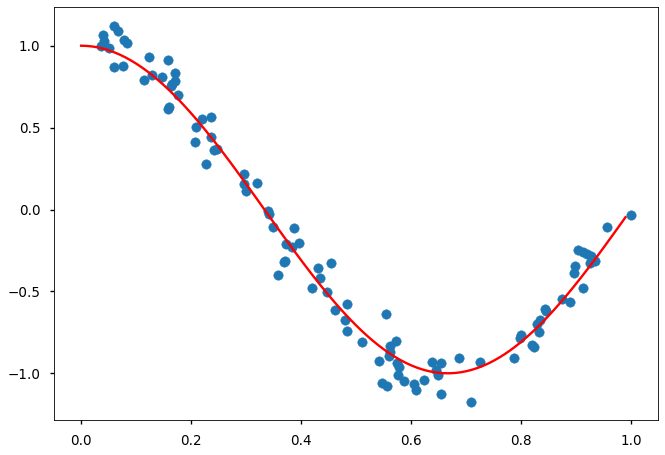

In [2]:
def true_fun(X):
    return np.cos(1.5 * np.pi * X)


# generate 100 samples from the true function, adding a random noise to each one

n_samples = 100

# set the range of those samples
min_x_train = 0
max_x_train = 1

X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1

plt.scatter(X, y)
plt.plot(
    np.arange(min_x_train, max_x_train, 0.01),
    np.cos(1.5 * np.pi * np.arange(min_x_train, max_x_train, 0.01)),
    color="red",
)
pass;

Coefficient (or slope) =  [-1.91284922]
Intercept =  0.7377707281297614
Score = 0.59


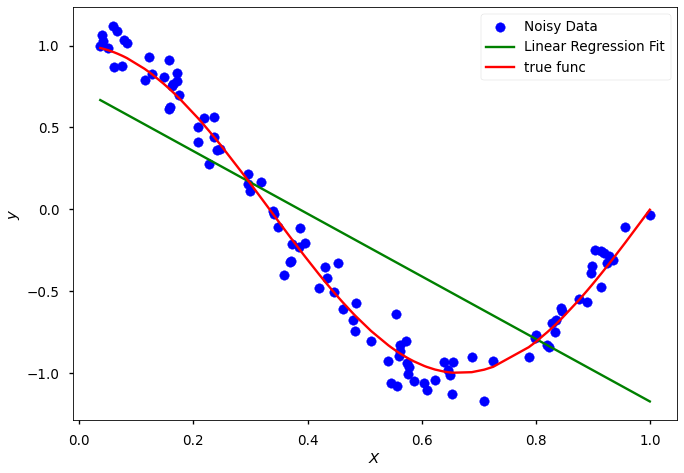

In [3]:
from sklearn.linear_model import LinearRegression

plt.scatter(X, y, label="Noisy Data", color="blue")

# Reshape X to a 2D array because LinearRegression expects that
# documentation: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

X_lin = X.reshape(-1, 1)
# print(X, X_lin, X.ndim, X_lin.ndim)

# Fit a linear regression model
lr = LinearRegression().fit(X_lin, y)


print("Coefficient (or slope) = ", lr.coef_)
print("Intercept = ", lr.intercept_)
print("Score = {:.2f}".format(lr.score(X_lin, y)))

# Plot the linear regression prediction
y_pred = lr.predict(X_lin)
plt.plot(X_lin, y_pred, label="Linear Regression Fit", color="green")

plt.plot(X, np.cos(1.5 * np.pi * X), label="true func", color="red")

# Add labels and legend
plt.xlabel("$X$")
plt.ylabel("$y$")
plt.legend()
pass;

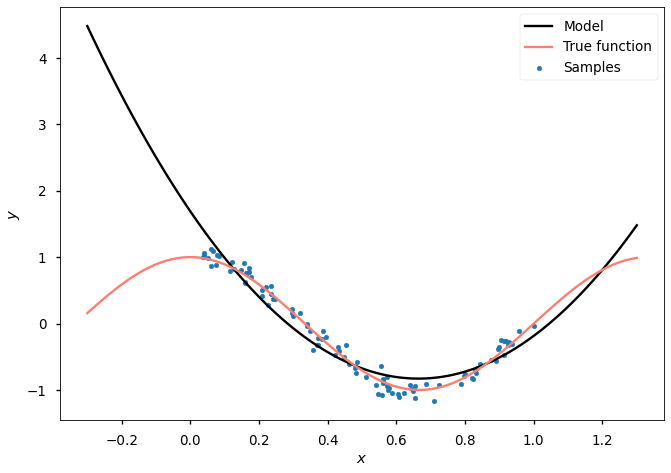

In [4]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

# `PolynomialFeatures` documentation: Generate a new feature matrix consisting of all polynomial combinations of the features with degree less than or equal to the specified degree. For example, if an input sample is two dimensional and of the form [a, b], the degree-2 polynomial features are [1, a, b, a^2, ab, b^2].

polynomial_features = PolynomialFeatures(degree=2, include_bias=False)

linear_regression = LinearRegression()

pipeline = Pipeline(
    [
        ("polynomial_features", polynomial_features),
        ("linear_regression", linear_regression),
    ]
)
pipeline.fit(X[:, np.newaxis], y)

X_test = np.linspace(-0.3, 1.3, 100)
fig, ax = plt.subplots(1)
ax.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model", color='black')
ax.plot(X_test, true_fun(X_test), label="True function",color='salmon')
ax.scatter(X, y,s=20, label="Samples")

ax.set_xlabel("$x$")
ax.set_ylabel("$y$")
ax.legend()
pass;

## But this is not the complete story—please read Alex Shtoff's [Are polynomial features the root of all evil?](https://alexshtf.github.io/2024/01/21/Bernstein.html) (2024)